In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re

In [2]:
fer_datasets = ["CK+", "MMI", "JAFFE", "TFD", "FER-2013", "AFEW7.0", 
    "SFEW2.0", "Multi-PIE", "BU-3DFE", "Oulu-CASIA", 
    "RaFD", "KDEF", "EmotioNet", "RAF-DB", "AffectNet", "ExpW"]


In [3]:
fer_datasets_LONG = [
    "Extended Cohn-Kanade", 
    'MMI Facial Expression',
    "Japanese Female Facial Expression", 
    "Toronto Face Database",
    "Binghamton University 3D Facial Expression",
    "Oulu-CASIA",
    "Radboud Faces Database",
    "Karolinska Directed Emotional Faces",
    "Acted Facial Expressions In The Wild",
    "Static Facial Expression in the Wild",
    "CMU Multi-PIE",
    "Affective Faces Database",
    "Expression in-the-Wild", 
    "Facial Expression Recognition 2013"
]


In [4]:
topics = ["facial expression recognition", "FER", "deep learning", "machine learning", "classification", "classifier", "neural network", "CNN"]

In [6]:
# Define the file paths for the two datasets
file_path_1 = 'scholarly_papers_combined_extended.csv'
file_path_2 = 'scholarly_papers_combined_extended_2.csv'
file_path_3 = 'scholarly_papers_combined_extended_3.csv'
file_path_4 = 'scholarly_papers_combined_extended_4.csv'
file_path_5 = "scholarly_papers_combined_extended_FER2013.csv"

# Load the two CSV files into DataFrames
df1 = pd.read_csv(file_path_1)
df2 = pd.read_csv(file_path_2)
df3 = pd.read_csv(file_path_3)
df4 = pd.read_csv(file_path_4)
df5 = pd.read_csv(file_path_5)


# Print the shapes of the individual DataFrames
print(f"Shape of df1: {df1.shape}")
print(f"Shape of df2: {df2.shape}")
print(f"Shape of df3: {df3.shape}")
print(f"Shape of df4: {df4.shape}")
print(f"Shape of df5: {df5.shape}")

# Concatenate the two DataFrames
merged_df = pd.concat([df1, df2, df3, df4, df5], ignore_index=True)

# Print the shape of the merged DataFrame
print(f"Shape of merged_df: {merged_df.shape}")

#merged_df

Shape of df1: (1483, 36)
Shape of df2: (1789, 36)
Shape of df3: (2890, 36)
Shape of df4: (1066, 36)
Shape of df5: (2157, 36)
Shape of merged_df: (9385, 36)


In [7]:
# Create a function to check if any dataset is in the 'Dataset' column
def extract_dataset(row):
    for dataset in fer_datasets_LONG:
        if dataset.lower() in str(row).lower():
            return dataset
    return None

# Create a function to check if any topic is in the 'Abstract' or 'Title' column
def extract_topic(row):
    for topic in topics:
        if topic.lower() in str(row).lower():
            return topic
    return None

merged_df['Detected_Dataset'] = merged_df['Dataset'].apply(extract_dataset)
merged_df['Detected_Topic'] = merged_df['Dataset'].apply(extract_topic)
merged_df = merged_df.drop(columns=['Dataset'])
#merged_df.shape

In [8]:
# Check for duplicate rows based on all columns
duplicate_rows = merged_df[merged_df.duplicated()]
duplicate_rows.shape

(8487, 37)

In [9]:
df = merged_df.copy()

# Function to merge unique datasets or topics
def merge_unique_entries(entries):
    # Remove None or NaN values and return unique values joined by a comma
    return ', '.join(sorted(set([entry for entry in entries if pd.notna(entry)])))

# Group by 'Title' and aggregate the 'Detected Dataset', 'Detected Topic' columns, and 'Mentions_' columns
df_clean = df.groupby('Title').agg({
    'Authors': 'first',  # Keep the first occurrence for non-duplicate columns
    'Year': 'first',
    'Cited By': 'first',
    'Detected_Dataset': merge_unique_entries,  # Merge and remove duplicates in 'Detected Dataset'
    'Detected_Topic': merge_unique_entries,    # Merge and remove duplicates in 'Detected Topic'
    'Abstract': 'first',  # Keep the first occurrence for 'Abstract'
    'DOI': 'first',       # Keep the first occurrence for 'DOI'
    'Journal': 'first',   # Keep the first occurrence for 'Journal'
    'URL': 'first',       # Keep the first occurrence for 'URL'
    
    # For 'Mentions_' columns, use the 'any()' function to keep 'True' if any row has 'True'
    'Mentions_Accuracy': 'any',
    'Mentions_F1': 'any',
    'Mentions_Precision': 'any',
    'Mentions_Recall': 'any',
    'Mentions_Auc': 'any',
    'Mentions_Roc': 'any',
    'Mentions_Sensitivity': 'any',
    'Mentions_Specificity': 'any',
    'Mentions_Confusion_matrix': 'any',
    'Mentions_Loss_function': 'any',
    'Mentions_Cross-entropy': 'any',
    'Mentions_Mean_squared_error': 'any',
    'Mentions_Overfitting': 'any',
    'Mentions_Underfitting': 'any',
    'Mentions_Cross-validation': 'any',
    'Mentions_Training_time': 'any',
    'Mentions_Inference_time': 'any',
    'Mentions_Statistical_significance': 'any',
    'Mentions_P-value': 'any',
    'Mentions_T-test': 'any',
    'Mentions_Anova': 'any',
    'Mentions_Correlation': 'any',
    'Mentions_Regression': 'any',
    'Mentions_Baseline_comparison': 'any',
    'Mentions_Mae': 'any',
    'Mentions_Rmse': 'any',
    'Mentions_Bias': 'any'
}).reset_index()

# Display the shape of the cleaned and original dataframes
print(df_clean.shape, merged_df.shape)

# Checking for missing values
missing_values = df_clean.isnull().sum()
#print(missing_values)


(263, 37) (9385, 37)


In [10]:
# Count the number of arXiv URLs in the cleaned dataframe
arxiv_url_count = df_clean['URL'].apply(lambda x: 'arxiv.org' in str(x)).sum()

print(f"Number of arXiv URLs: {arxiv_url_count}")


Number of arXiv URLs: 41


In [11]:
# Descriptive statistics for numerical columns
summary_stats = df_clean[['Year', 'Cited By']].describe()

# Count how often statistical terms are mentioned
statistical_terms_counts = df_clean[['Mentions_Accuracy', 'Mentions_Statistical_significance', 'Mentions_P-value', 'Mentions_T-test',
                                     'Mentions_Anova', 'Mentions_Correlation', 'Mentions_Regression', 'Mentions_Baseline_comparison',
                                     'Mentions_Mae', 'Mentions_Rmse', 'Mentions_Bias']].sum()

print(summary_stats)
print(statistical_terms_counts)

              Year     Cited By
count   263.000000   263.000000
mean   2014.292776   396.376426
std       5.548006   596.086966
min    1989.000000   100.000000
25%    2011.000000   139.500000
50%    2016.000000   213.000000
75%    2018.000000   368.500000
max    2022.000000  5135.000000
Mentions_Accuracy                    23
Mentions_Statistical_significance     0
Mentions_P-value                      0
Mentions_T-test                       1
Mentions_Anova                        0
Mentions_Correlation                  1
Mentions_Regression                   2
Mentions_Baseline_comparison          0
Mentions_Mae                          1
Mentions_Rmse                         0
Mentions_Bias                         3
dtype: int64


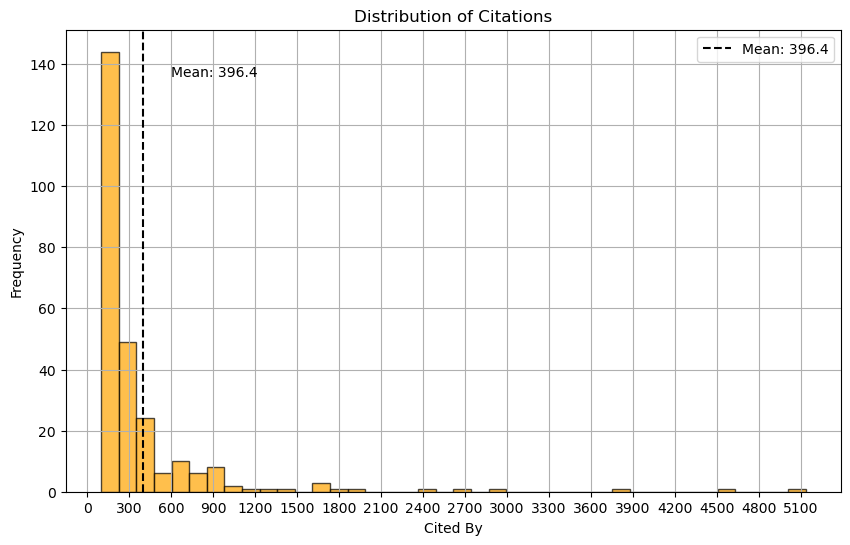

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the mean and median
mean_citations = df_clean['Cited By'].mean()
median_citations = df_clean['Cited By'].median()

# Create the histogram with bar border color and increased x-tick labels
plt.figure(figsize=(10, 6))

# Histogram with border color (edgecolor) and larger number of bins
plt.hist(df_clean['Cited By'], bins=40, color='orange', edgecolor='black', alpha=0.7)

# Adding vertical lines for mean and median
plt.axvline(mean_citations, color='black', linestyle='dashed', linewidth=1.5, label=f'Mean: {mean_citations:.1f}')

# Adding title and labels
plt.title('Distribution of Citations')
plt.xlabel('Cited By')
plt.ylabel('Frequency')

# Increasing the number of x-tick labels
max_cited_by = df_clean['Cited By'].max()  # Find the maximum value in 'Cited By'
plt.xticks(np.arange(0, max_cited_by + 100, step=300))  # Set ticks with a step of 500

# Adding annotations for mean and median
plt.text(mean_citations + 200, plt.ylim()[1] * 0.9, f'Mean: {mean_citations:.1f}', color='black', fontsize=10)

# Adding a legend
plt.legend()

# Display grid
plt.grid(True)

# Show the plot
plt.show()


In [13]:
# Get the 10 most cited papers by sorting the 'Cited By' column
top_10_cited = df_clean.sort_values(by='Cited By', ascending=False).head()

# Display the top 10 most cited papers
top_10_cited['URL']

250         https://ieeexplore.ieee.org/document/5543262
119          https://ieeexplore.ieee.org/document/554195
191                                     https://kdef.se/
221    https://www.tandfonline.com/doi/full/10.1080/0...
206    https://www.cs.cmu.edu/afs/cs/project/PIE/Mult...
Name: URL, dtype: object

In [14]:
cited_5135 = df_clean[df_clean['Cited By'] == 5135]
cited_5135['URL']

250    https://ieeexplore.ieee.org/document/5543262
Name: URL, dtype: object

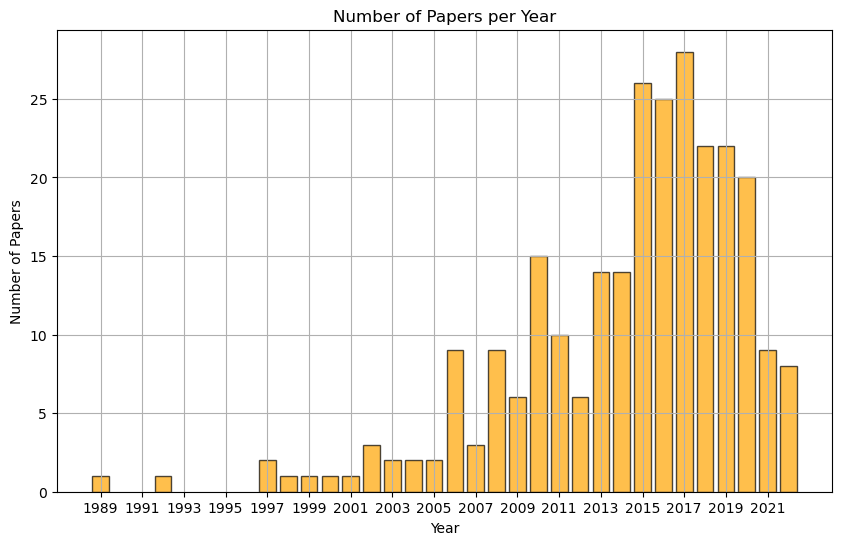

In [15]:
# Plot 1: Number of Papers per Year

# Count the number of papers for each year
papers_per_year = df_clean['Year'].value_counts().sort_index()

plt.figure(figsize=(10, 6))

# Create a bar plot for the number of papers per year
plt.bar(papers_per_year.index, papers_per_year.values, color='orange', edgecolor='black', alpha=0.7)

# Adding title and labels
plt.title('Number of Papers per Year')
plt.xlabel('Year')
plt.ylabel('Number of Papers')

# Display grid
plt.grid(True)

# Adding x-tick labels with a step of 1 (for every year)
plt.xticks(np.arange(papers_per_year.index.min(), papers_per_year.index.max() + 1, step=2))

# Show the plot
plt.show()


In [16]:
# Sort the DataFrame by the 'Year' column in ascending order
earliest_papers = df_clean.sort_values(by='Year', ascending=True).head(10)

# Display the 10 earliest papers
print(earliest_papers['URL'])

37     https://link.springer.com/article/10.1007/BF00...
38     https://journals.sagepub.com/doi/10.1177/00220...
119          https://ieeexplore.ieee.org/document/554195
202    https://link.springer.com/article/10.1023/A:10...
191                                     https://kdef.se/
131            https://pubmed.ncbi.nlm.nih.gov/10633314/
115          https://ieeexplore.ieee.org/document/840614
229          https://ieeexplore.ieee.org/document/908962
118         https://ieeexplore.ieee.org/document/1000134
91             https://pubmed.ncbi.nlm.nih.gov/12495523/
Name: URL, dtype: object


In [17]:
# Remove rows where 'Year' is less than 1997
df_clean = df_clean[df_clean['Year'] >= 1997]

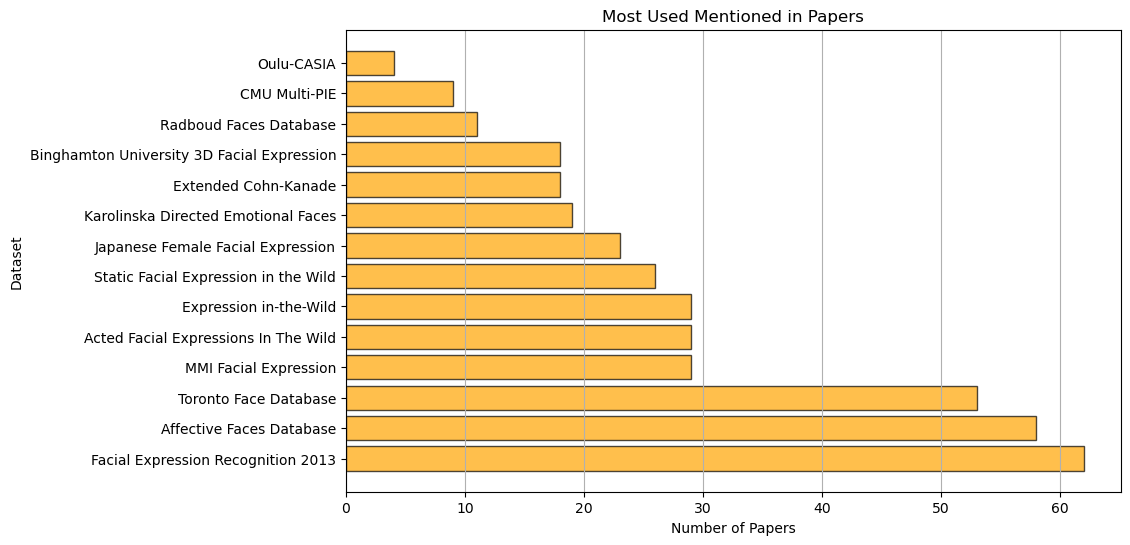

In [18]:
# Initialize an empty dictionary to store dataset counts
dataset_counts = {}

# Count occurrences of each dataset using regex
for dataset in fer_datasets_LONG:
    count = df_clean['Detected_Dataset'].apply(lambda x: bool(re.search(dataset, str(x), re.IGNORECASE))).sum()
    dataset_counts[dataset] = count

# Convert the dataset counts into a DataFrame
dataset_counts_df = pd.DataFrame(list(dataset_counts.items()), columns=['Detected_Dataset', 'Count'])

# Sort dataset counts for better visualization
dataset_counts_df_sorted = dataset_counts_df.sort_values(by='Count', ascending=False)

# Plot the bar chart
plt.figure(figsize=(10, 6))

# Create a horizontal bar plot for the most used datasets
plt.barh(dataset_counts_df_sorted['Detected_Dataset'], dataset_counts_df_sorted['Count'], color='orange', edgecolor='black', alpha=0.7)

# Adding title and labels
plt.title('Most Used Mentioned in Papers')
plt.xlabel('Number of Papers')
plt.ylabel('Dataset')

# Display grid
plt.grid(True, axis='x')

# Show the plot
plt.show()

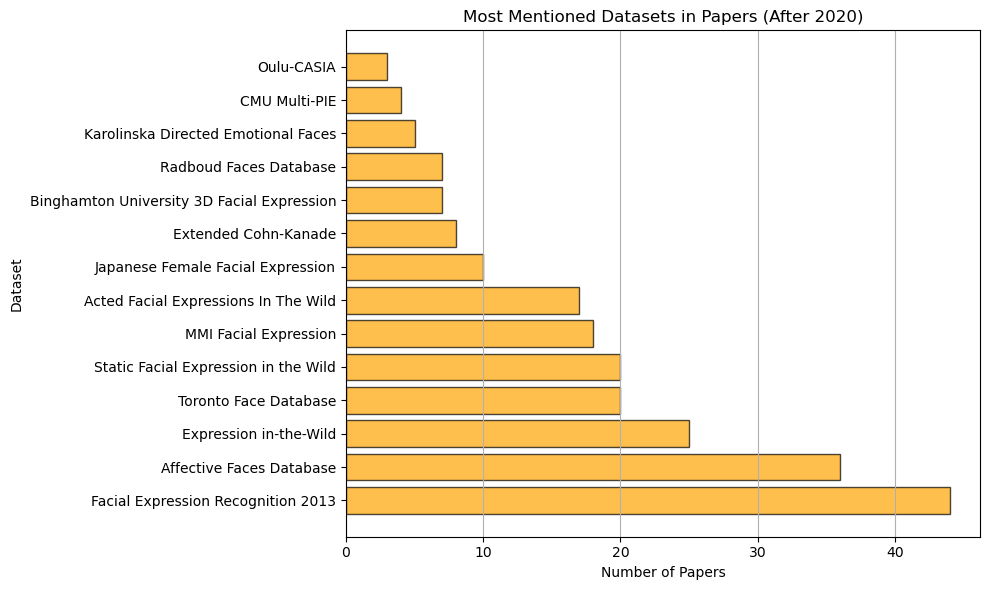

In [19]:
import re
import pandas as pd
import matplotlib.pyplot as plt

# Filter the dataframe to include only rows where 'Year' is greater than or equal to 2015
df_filtered = df_clean[df_clean['Year'] >= 2016]

# Initialize an empty dictionary to store dataset counts
dataset_counts_filtered = {}

# Count occurrences of each dataset using regex after 2015
for dataset in fer_datasets_LONG:
    count = df_filtered['Detected_Dataset'].apply(lambda x: bool(re.search(dataset, str(x), re.IGNORECASE))).sum()
    dataset_counts_filtered[dataset] = count

# Convert the dataset counts into a DataFrame
dataset_counts_df_filtered = pd.DataFrame(list(dataset_counts_filtered.items()), columns=['Detected_Dataset', 'Count'])

# Sort dataset counts for better visualization
dataset_counts_df_sorted_filtered = dataset_counts_df_filtered.sort_values(by='Count', ascending=False)

# Plot the bar chart
plt.figure(figsize=(10, 6))

# Create a horizontal bar plot for the most used datasets after 2015
plt.barh(dataset_counts_df_sorted_filtered['Detected_Dataset'], dataset_counts_df_sorted_filtered['Count'], color='orange', edgecolor='black', alpha=0.7)

# Adding title and labels
plt.title('Most Mentioned Datasets in Papers (After 2020)')
plt.xlabel('Number of Papers')
plt.ylabel('Dataset')

# Display grid
plt.grid(True, axis='x')

# Show the plot
plt.tight_layout()
plt.show()


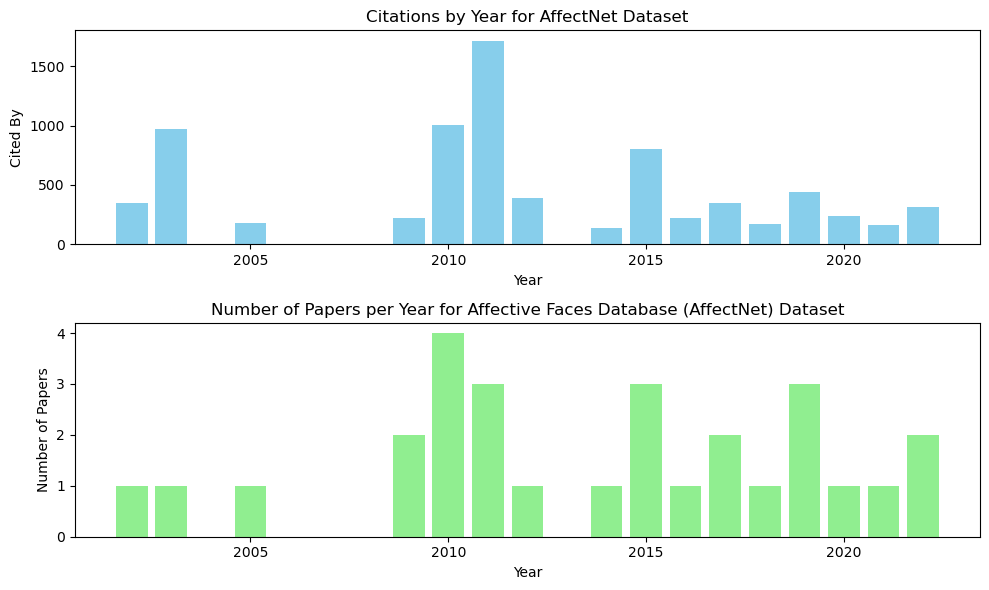

In [20]:
import matplotlib.pyplot as plt

# Filter the dataframe to include only rows where 'Detected_Dataset' is 'AffectNet'
df_affectnet = df_clean[df_clean['Detected_Dataset'] == 'Affective Faces Database']

# Plot 1: Cited By per Year for AffectNet Dataset
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.bar(df_affectnet['Year'], df_affectnet['Cited By'], color='skyblue')
plt.title('Citations by Year for AffectNet Dataset')
plt.xlabel('Year')
plt.ylabel('Cited By')

# Plot 2: Number of Papers per Year for AffectNet Dataset
plt.subplot(2, 1, 2)
year_counts = df_affectnet['Year'].value_counts().sort_index()
plt.bar(year_counts.index, year_counts.values, color='lightgreen')
plt.title('Number of Papers per Year for Affective Faces Database (AffectNet) Dataset')
plt.xlabel('Year')
plt.ylabel('Number of Papers')

plt.tight_layout()
plt.show()


In [21]:
# Retrieve the links for the papers that mention 'Bias' and 'Accuracy' for 'Affective Faces Database'
bias_links = df_clean[(df_clean['Detected_Dataset'] == 'Affective Faces Database') & (df_clean['Mentions_Bias'] == True)]['URL']
accuracy_links = df_clean[(df_clean['Detected_Dataset'] == 'Affective Faces Database') & (df_clean['Mentions_Accuracy'] == True)]['URL']

# Convert the results to lists
bias_links_list = bias_links.tolist()
accuracy_links_list = accuracy_links.tolist()

# Print the links
print("Links to papers mentioning bias:")
for link in bias_links_list:
    print(link)

print("\nLinks to papers mentioning accuracy:")
for link in accuracy_links_list:
    print(link)


Links to papers mentioning bias:

Links to papers mentioning accuracy:
https://pubmed.ncbi.nlm.nih.gov/19923040/
https://www.nature.com/articles/s42256-020-00280-0
https://arxiv.org/abs/1512.00932


<Figure size 1000x600 with 0 Axes>

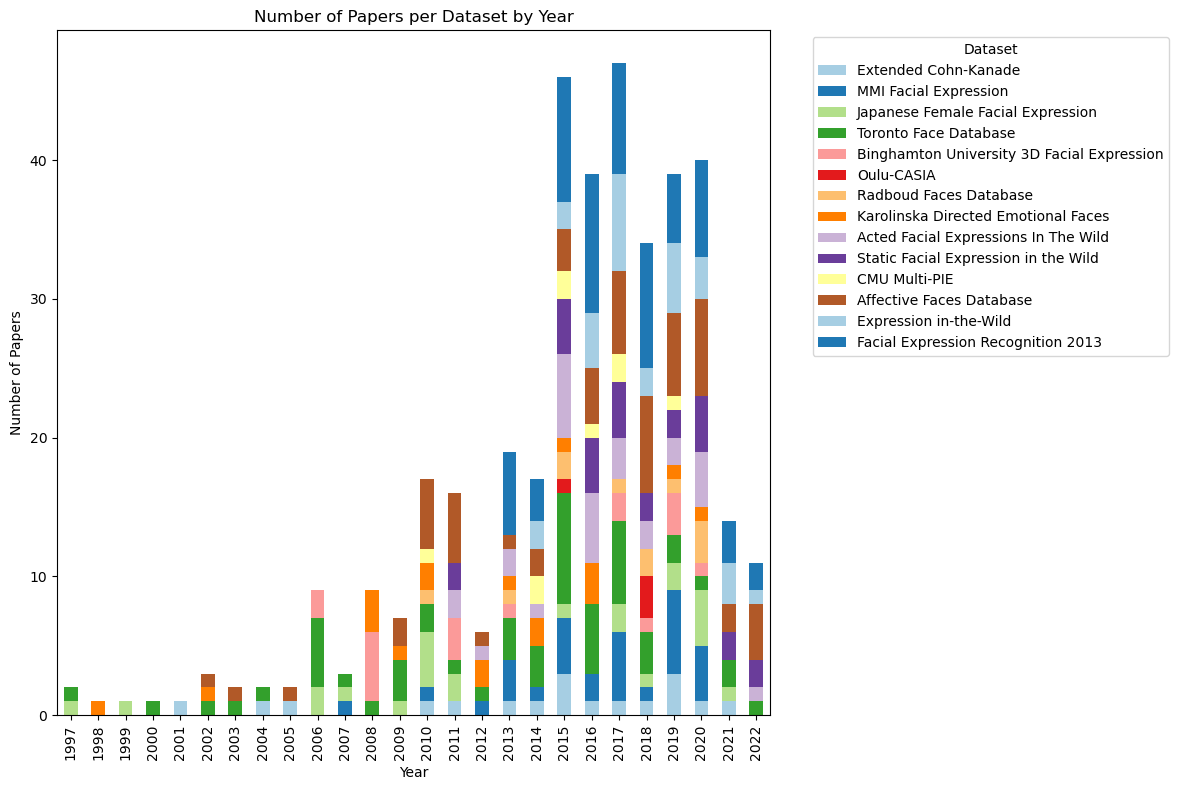

In [22]:
import re
import pandas as pd
import matplotlib.pyplot as plt

# Initialize an empty dictionary to store dataset counts per year
dataset_year_counts = {}

# Iterate over each dataset
for dataset in fer_datasets_LONG:
    # Filter rows where the dataset is detected using regex and group by year
    yearly_counts = df_clean[df_clean['Detected_Dataset'].apply(lambda x: bool(re.search(dataset, str(x), re.IGNORECASE)))]
    
    # Count the occurrences per year
    dataset_year_counts[dataset] = yearly_counts.groupby('Year').size()

# Convert the dictionary into a DataFrame
dataset_year_counts_df = pd.DataFrame(dataset_year_counts).fillna(0)

# Plot the bar chart
plt.figure(figsize=(10, 6))

# Create a stacked bar plot for the datasets per year
dataset_year_counts_df.plot(kind='bar', stacked=True, figsize=(12, 8), color=plt.cm.Paired.colors)

# Adding title and labels
plt.title('Number of Papers per Dataset by Year')
plt.xlabel('Year')
plt.ylabel('Number of Papers')

# Display the legend and show the plot
plt.legend(title='Dataset', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [23]:
df_clean.to_csv('../Scrapes_ALL.csv')

In [24]:
# Count the number of rows that have a valid DOI (not missing or 'No DOI')
doi_count = df_clean[df_clean['DOI'].notna() & (df_clean['DOI'] != 'No DOI')].shape[0]

# Display the count
print(f"Number of valid DOI numbers: {doi_count}")


Number of valid DOI numbers: 0


In [26]:
df_clean.shape

(261, 37)